<a href="https://colab.research.google.com/github/FaezeM/NLP_Bambara/blob/main/normal_labse_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [5]:
import zipfile
import os

zip_path = "/content/dataset-20250419T135918Z-001.zip"
extract_path = "/content/dokotoro"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [6]:
import csv

with open(os.path.join("/content/dokotoro/dataset/test_eng_bam.csv"), mode='r', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader)
    en_sentences = [row[0] for row in reader]

with open(os.path.join("/content/dokotoro/dataset/test_fra_bam.csv"), mode='r', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader)
    fr_sentences = [row[0] for row in reader]

with open(os.path.join("/content/dokotoro/dataset/test_fra_bam.csv"), mode='r', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader)
    bam_sentences = [row[1] for row in reader]

bam_sentences[:10]

['Mɔgɔ min man girin walimaa man kɛnɛ barisa a tɛ balo nafama sɔrɔ ka dun walima a tɛ dumuni caman sɔrɔ, a bɛ fɔ ko o tigi balocogo man ɲi walima balodɛsɛ bɛ a la. Balodɛsɛ bɛ o tigi degun.',
 'Dan',
 'Woro ɲuguɲugulen man ca\xa0yan.',
 'Sɔgɔsɔgɔninjɛ ye bana ye min yɛlɛma ka teli. A banakisɛ bɛ jɛnsɛn fiɲɛ fɛ ni banabagatɔ sɔgɔsɔgɔra. Mɔgɔ minnu ni banabagatɔ bɛ so kelen kɔnɔ, kɛrɛn\xadkɛrɛnnenya la denmisɛnw; bana in ka teli ka olu minɛ.',
 'Aw ye bilasiralikanw matarafa balodɛsɛ kunbɛncogo\xa0kan.',
 'Dɔgɔtɔrɔ dɔw bɛ pikiri sɛbɛn mɔgɔw ka furaw la ka a sɔrɔ a ɲɛci tɛ yen. O bɛɛ kɔfɛ, u bɛ tila ka pikiri kɛ wari minɛ. U tɛ pikiri gɛlɛyaw ni a kɔlɔlɔw jate dugumisɛnw kɔnɔ.',
 'Kɔnɔboli bɛ taa ka segin, tumadɔ la kɔnɔ bɛ\xa0ja.',
 'Jolimisɛnniw (chancre mou)',
 'Fangasɔrɔdumuniw nafa ka bon kosɛbɛ: misali la maoloseri, alikamaseri, pɔmutɛri, walima bananku. Ni a’ ye sukaro ni tulu dɔɔni kɛ a nin dumuni kofɔlenw na, o bɛ dɔ fara u fanga kan. A’ ye a ɲinin banabagatɔ fɛ, a ka minfɛn suka

In [7]:
bam_sentences = [s.replace('\xa0', ' ') for s in bam_sentences]
bam_sentences[:10]

['Mɔgɔ min man girin walimaa man kɛnɛ barisa a tɛ balo nafama sɔrɔ ka dun walima a tɛ dumuni caman sɔrɔ, a bɛ fɔ ko o tigi balocogo man ɲi walima balodɛsɛ bɛ a la. Balodɛsɛ bɛ o tigi degun.',
 'Dan',
 'Woro ɲuguɲugulen man ca yan.',
 'Sɔgɔsɔgɔninjɛ ye bana ye min yɛlɛma ka teli. A banakisɛ bɛ jɛnsɛn fiɲɛ fɛ ni banabagatɔ sɔgɔsɔgɔra. Mɔgɔ minnu ni banabagatɔ bɛ so kelen kɔnɔ, kɛrɛn\xadkɛrɛnnenya la denmisɛnw; bana in ka teli ka olu minɛ.',
 'Aw ye bilasiralikanw matarafa balodɛsɛ kunbɛncogo kan.',
 'Dɔgɔtɔrɔ dɔw bɛ pikiri sɛbɛn mɔgɔw ka furaw la ka a sɔrɔ a ɲɛci tɛ yen. O bɛɛ kɔfɛ, u bɛ tila ka pikiri kɛ wari minɛ. U tɛ pikiri gɛlɛyaw ni a kɔlɔlɔw jate dugumisɛnw kɔnɔ.',
 'Kɔnɔboli bɛ taa ka segin, tumadɔ la kɔnɔ bɛ ja.',
 'Jolimisɛnniw (chancre mou)',
 'Fangasɔrɔdumuniw nafa ka bon kosɛbɛ: misali la maoloseri, alikamaseri, pɔmutɛri, walima bananku. Ni a’ ye sukaro ni tulu dɔɔni kɛ a nin dumuni kofɔlenw na, o bɛ dɔ fara u fanga kan. A’ ye a ɲinin banabagatɔ fɛ, a ka minfɛn sukaromaw cam

In [9]:
from sentence_transformers import SentenceTransformer

In [10]:
model = SentenceTransformer('sentence-transformers/LaBSE')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

In [16]:
en_embeddings = model.encode(en_sentences)
fr_embeddings = model.encode(fr_sentences)
bam_embeddings = model.encode(bam_sentences)

In [19]:
import numpy as np


In [14]:
save_path = "/content/drive/MyDrive/embeddings"
os.makedirs(save_path, exist_ok=True)

In [20]:
np.save(os.path.join(save_path, "en_embeddings_labse.npy"), en_embeddings)
np.save(os.path.join(save_path, "fr_embeddings_labse.npy"), fr_embeddings)
np.save(os.path.join(save_path, "bam_embeddings_labse.npy"), bam_embeddings)

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def run_pca_and_plot(embeddings_en, embeddings_fr, embeddings_bam, title="LaBSE EN/FR/BAM Alignment"):
    # Ensure all embeddings are 3D (batch_size, seq_len, hidden_size)
    def flatten_embeddings(embeddings):
        if embeddings.ndim == 3:
            return embeddings.mean(axis=1)
        elif embeddings.ndim == 2:
            return embeddings
        else:
            raise ValueError(f"Invalid embedding shape: {embeddings.shape}")

    # Flatten all
    en = flatten_embeddings(embeddings_en)
    fr = flatten_embeddings(embeddings_fr)
    bam = flatten_embeddings(embeddings_bam)

    # Trim to the smallest number of samples
    min_len = min(len(en), len(fr), len(bam))
    en, fr, bam = en[:min_len], fr[:min_len], bam[:min_len]

    # Stack all into one array
    X = np.vstack([en, fr, bam])
    y = [0] * min_len + [1] * min_len + [2] * min_len  # 0 = EN, 1 = FR, 2 = BAM

    # PCA
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    # Plot
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'green', 'orange']
    labels = ['English', 'French', 'Bambara']
    for i, color in enumerate(colors):
        idx = [j for j, label in enumerate(y) if label == i]
        plt.scatter(X_reduced[idx, 0], X_reduced[idx, 1], c=color, label=labels[i], alpha=0.6)

    plt.legend()
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)
    plt.show()


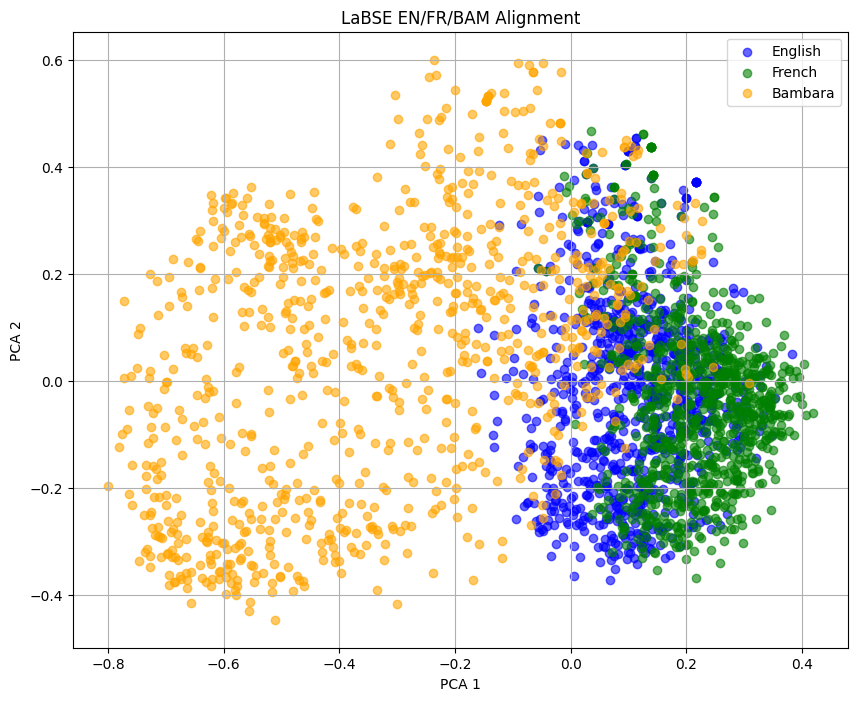

In [24]:
run_pca_and_plot(en_embeddings, fr_embeddings, bam_embeddings, title="LaBSE EN/FR/BAM Alignment")